In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('master_dataset_09122019.pkl')

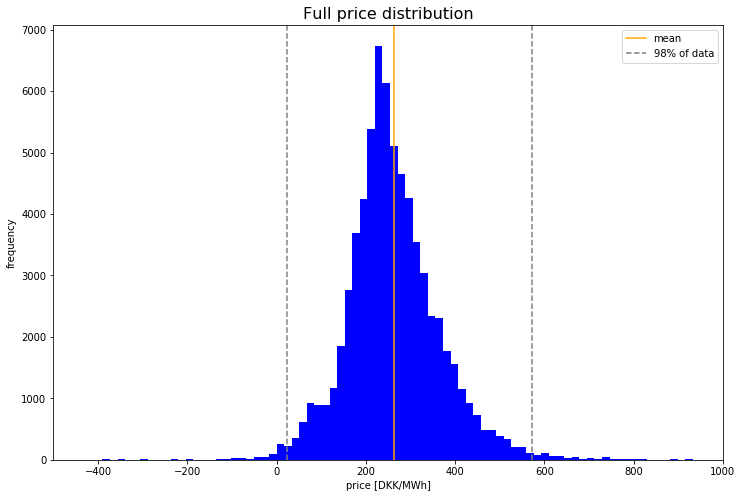

In [3]:
plt.figure(figsize=(12, 8))
plt.title('Full price distribution', fontsize=16)
plt.hist(data['dk2'], bins=200, color='blue')
plt.axvline(262.98, color='orange', label='mean')
plt.axvline(24, color='grey', linestyle='dashed')
plt.axvline(573, color='grey', linestyle='dashed', label='98% of data')
plt.xlabel('price [DKK/MWh]')
plt.ylabel('frequency')
plt.xlim(-500, 1000)
plt.legend()
plt.show()

In [4]:
data['dk2'].median()

251.22

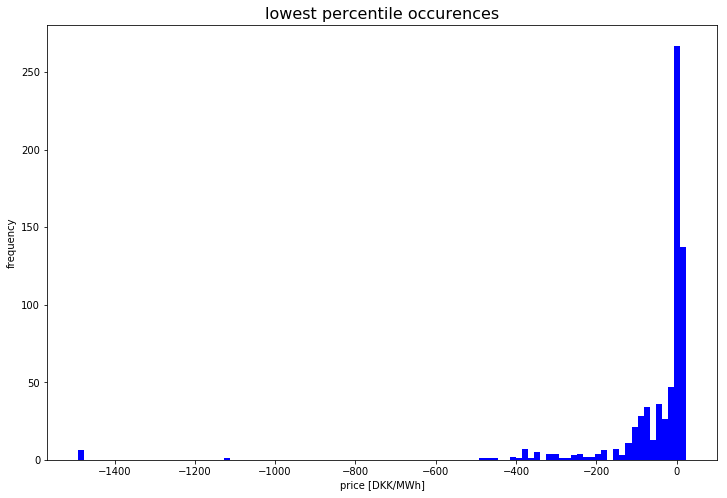

In [5]:
plt.figure(figsize=(12, 8))
plt.title('lowest percentile occurences', fontsize=16)
plt.hist(data['dk2'][data.dk2 < 24.4], bins=100, color='blue')
plt.xlabel('price [DKK/MWh]')
plt.ylabel('frequency')
plt.show()

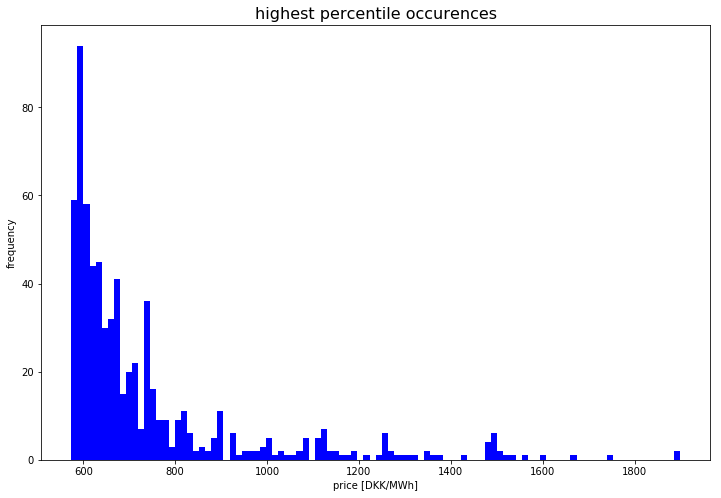

In [6]:
plt.figure(figsize=(12, 8))
plt.title('highest percentile occurences', fontsize=16)
plt.hist(data['dk2'][data.dk2 >573.79], bins=100, color='blue')
plt.xlabel('price [DKK/MWh]')
plt.ylabel('frequency')
plt.show()

In [10]:
data_2011 = data['dk2'][data.index.year == 2011]
data_2012 = data['dk2'][data.index.year == 2012]
data_2013 = data['dk2'][data.index.year == 2013]
data_2014 = data['dk2'][data.index.year == 2014]
data_2015 = data['dk2'][data.index.year == 2015]
data_2016 = data['dk2'][data.index.year == 2016]
data_2017 = data['dk2'][data.index.year == 2017]
data_2018 = data['dk2'][data.index.year == 2018]
data_2019 = data['dk2'][data.index.year == 2019]

In [52]:
print(data_2012.mean())
print(data_2013.mean())
print(data_2014.mean())
print(data_2015.mean())
print(data_2016.mean())
print(data_2017.mean())
print(data_2018.mean())
print(data_2019.mean())


313.71512295081953
279.5940095239893
295.3641837509956
239.67923968706867
182.61544744962572
218.85799404129352
237.83040521218248
344.3381711939168
300.55096130255106


In [43]:
data_hist.shape

(8760, 7)

In [42]:
import numpy as np
data_hist = np.vstack([data_2012[0:8760].values, 
          data_2013[0:8760].values, 
          data_2014[0:8760].values, 
          data_2015[0:8760].values, 
          data_2016[0:8760].values,
          data_2017[0:8760].values, 
          data_2018[0:8760].values]).T

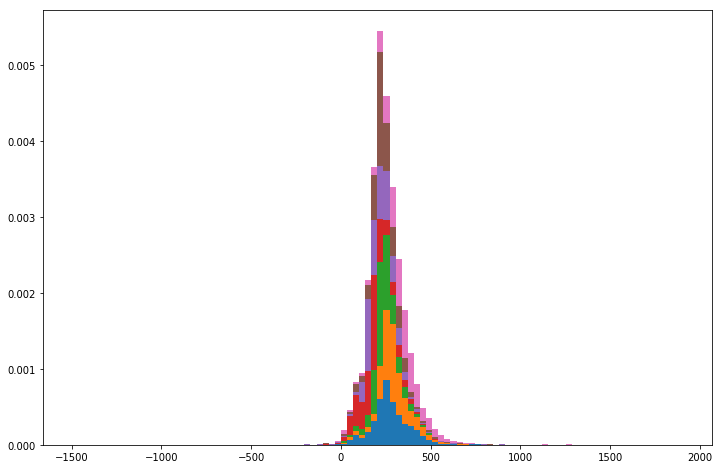

In [54]:
n_bins=100
plt.figure(figsize=(12, 8))
colors = ['blue', 'orange', 'green', 'yellow', 'purple', 'red', 'teal']
plt.hist(data_hist, n_bins, density=1, histtype='bar', stacked=True, label=colors)
plt.show()

In [70]:
mean_dict = {
    '2012' : data_2012.mean(),
    '2013' : data_2013.mean(),
    '2014' : data_2014.mean(),
    '2015' : data_2015.mean(),
    '2016' : data_2016.mean(),
    '2017' : data_2017.mean(),
    '2018' : data_2018.mean(),
    '2019' : data_2019.mean()
}

std_dict = {
    '2012' : data_2012.std(),
    '2013' : data_2013.std(),
    '2014' : data_2014.std(),
    '2015' : data_2015.std(),
    '2016' : data_2016.std(),
    '2017' : data_2017.std(),
    '2018' : data_2018.std(),
    '2019' : data_2019.std()
}

mean_df = pd.DataFrame.from_dict(mean_dict, orient='index')
std_df = pd.DataFrame.from_dict(std_dict, orient='index')

In [102]:
training_mean = (data_2012.mean() + data_2013.mean() + data_2014.mean() + data_2015.mean())/4
validation_mean = (data_2016.mean() + data_2017.mean())/2
test_mean = (data_2018.mean() + data_2019.mean())/2

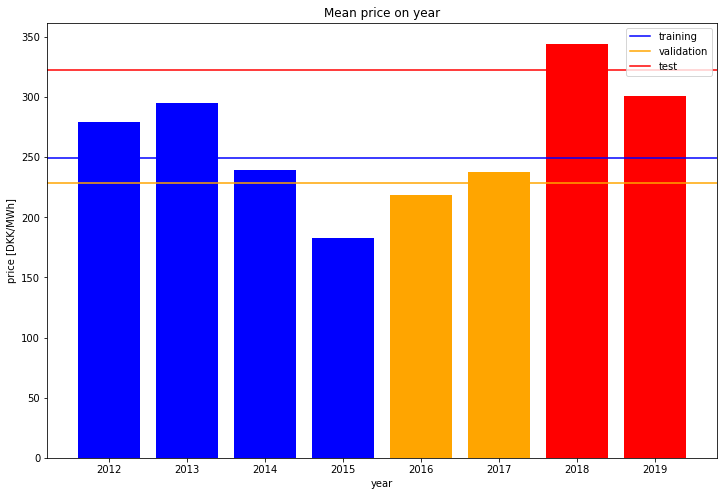

In [103]:
plt.figure(figsize=(12,8))
plt.title('Mean price on year')
plt.bar(mean_df.index, mean_df.values.flatten(), color=['blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'red', 'red'])
plt.axhline(training_mean, color='blue', label='training')
plt.axhline(validation_mean, color='orange', label='validation')
plt.axhline(test_mean, color='red', label='test')
plt.xlabel('year')
plt.ylabel('price [DKK/MWh]')
plt.legend()
plt.show()

In [98]:
training_std = (data_2012.std() + data_2013.std() + data_2014.std() + data_2015.std())/4
validation_std = (data_2016.std() + data_2017.std())/2
test_std = (data_2018.std() + data_2019.std())/2

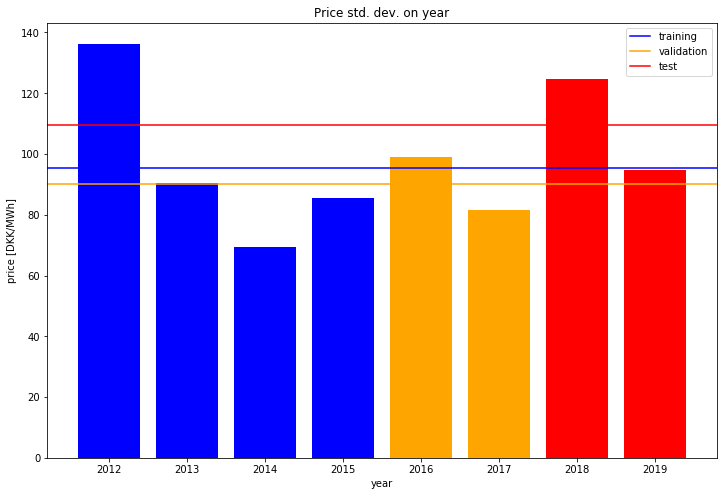

In [99]:
plt.figure(figsize=(12,8))
plt.title('Price std. dev. on year')
plt.bar(std_df.index, std_df.values.flatten(), color=['blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'red', 'red'])
plt.axhline(training_std, color='blue', label='training')
plt.axhline(validation_std, color='orange', label='validation')
plt.axhline(test_std, color='red', label='test')
plt.xlabel('year')
plt.ylabel('price [DKK/MWh]')
plt.legend()
plt.show()